# KNN [ K-Nearest Neighbors ] - Classifier 
- K-Nearest Neighbors (KNN) is a non-parametric, supervised learning algorithm used for both classification and regression. It operates on a simple principle: similar data points exist in close proximity to each other.
- How It Works
- The algorithm doesn't "learn" a mathematical function; instead, it stores the entire training dataset and makes predictions based on the distance between points.
- 1. Choose the number of neighbors ($k$): Decide how many nearby points will influence the result.
  2. Calculate Distance: When a new data point arrives, the algorithm calculates the distance between that point and all other points in the dataset (usually using Euclidean distance).
  3. Identify Neighbors: It selects the $k$ points with the smallest distances to the new point.
  4. Vote (Classification)::
      -  Classification: The new point is assigned the class that is most common among its $k$ neighbors.

## Choosing the Right $k$
- The value of $k$ significantly impacts the model's performance:
- 1. Small $k$ (e.g., $k=1$): The model is sensitive to noise and outliers (potential overfitting).
  2. Large $k$: The model becomes smoother and more stable but may overlook local patterns (potential underfitting).
  3. Note: For classification, $k$ is usually an odd number to avoid "ties" in voting.

## Distance Metrics
- The most common way to calculate the "closeness" of points is the Euclidean Distance formula:
$$d(p, q) = \sqrt{\sum_{i=1}^{n} (p_i - q_i)^2}$$

### Import Libraries 

In [21]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Load Dataset

In [23]:
data = pd.read_csv('data.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


### Feature Extraction 

In [25]:
data.drop(columns=['id','Unnamed: 32'],inplace=True)

### Split data into Train and Test set

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:], data.iloc[:,0],test_size=0.2, random_state=2)

In [28]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

### using StandardScaler to scale data

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Fitting - KNN Classifier

In [32]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### Evaluation for KNN - Classifier

In [34]:
y_pred = knn.predict(X_test)
print("Accuracy for KNN ::",accuracy_score(y_test,y_pred))

Accuracy for KNN :: 0.9912280701754386


### For best Value of k 

In [53]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scores = []
k_range = range(1, 21)

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)
    print(f"Accuracy for k={i} :: {acc:.4f}")


Accuracy for k=1 :: 0.9561
Accuracy for k=2 :: 0.9737
Accuracy for k=3 :: 0.9912
Accuracy for k=4 :: 0.9737
Accuracy for k=5 :: 0.9737
Accuracy for k=6 :: 0.9737
Accuracy for k=7 :: 0.9737
Accuracy for k=8 :: 0.9737
Accuracy for k=9 :: 0.9737
Accuracy for k=10 :: 0.9737
Accuracy for k=11 :: 0.9737
Accuracy for k=12 :: 0.9737
Accuracy for k=13 :: 0.9737
Accuracy for k=14 :: 0.9649
Accuracy for k=15 :: 0.9649
Accuracy for k=16 :: 0.9649
Accuracy for k=17 :: 0.9649
Accuracy for k=18 :: 0.9649
Accuracy for k=19 :: 0.9649
Accuracy for k=20 :: 0.9649


###  Plotting the results

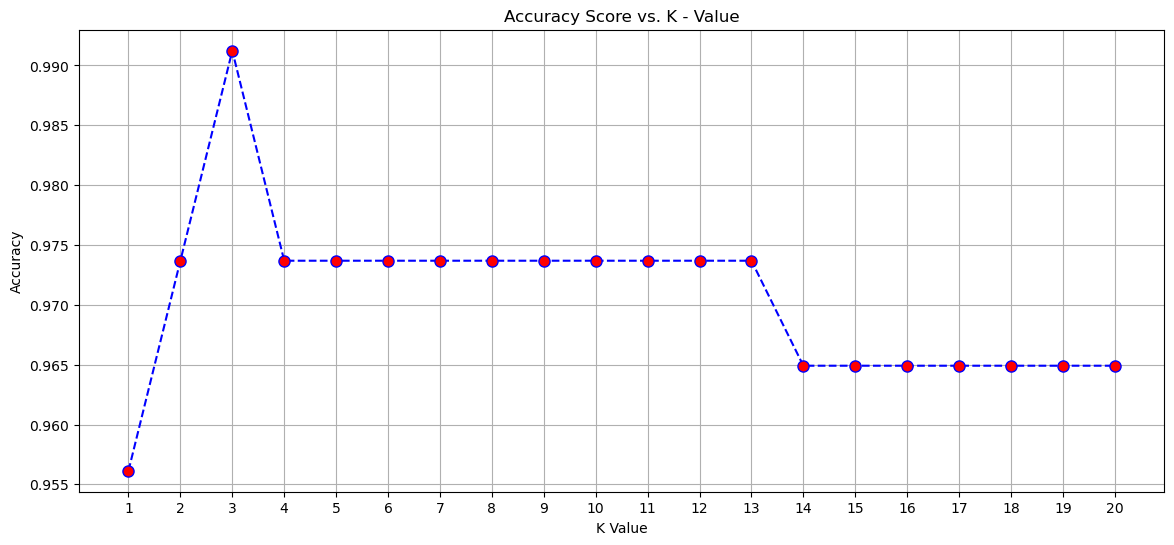

In [62]:
plt.figure(figsize=(14, 6))
plt.plot(k_range, scores, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=8)
plt.title('Accuracy Score vs. K - Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()